<a href="https://colab.research.google.com/github/vinismachadoo/cluster-atletas-olimpicos/blob/main/analise_multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install factor_analyzer -q

     |████████████████████████████████| 40kB 3.7MB/s 


In [2]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from factor_analyzer import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

In [5]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv', index_col=0)

In [7]:
df.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

In [8]:
atletas_femininas = df[df['sex'] == 'f'].reset_index(drop=True)

In [9]:
fem_data = atletas_femininas.iloc[:,:-2]

In [10]:
chi_square_value_fem, p_value_fem = calculate_bartlett_sphericity(fem_data)
chi_square_value_fem, p_value_fem

(1743.5158385701527, 0.0)

In [11]:
_, kmo_model_fem = calculate_kmo(fem_data)
kmo_model_fem

0.6122457430579239

In [12]:
fem_data_scaled = StandardScaler().fit_transform(fem_data)
cov_mat_fem = np.cov(fem_data_scaled.T, bias=True)
pd.DataFrame(cov_mat_fem)

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.240535,0.852203,0.776775,-0.092800,0.014216,-0.139228,-0.139249,0.086205,0.011299,0.012562
1,0.240535,1.000000,0.198980,0.201422,-0.020675,0.145820,0.119705,0.118673,0.048301,-0.006855,0.088692
2,0.852203,0.198980,1.000000,0.903432,-0.127142,0.008696,-0.224654,-0.194048,0.119844,0.020647,0.010481
3,0.776775,0.201422,0.903432,1.000000,-0.035821,0.131102,-0.158038,-0.132993,0.163471,-0.037993,0.072610
4,-0.092800,-0.020675,-0.127142,-0.035821,1.000000,0.135066,0.156646,0.132319,-0.049979,-0.141890,0.021299
5,0.014216,0.145820,0.008696,0.131102,0.135066,1.000000,0.678488,0.660492,0.747491,0.231665,0.847015
6,-0.139228,0.119705,-0.224654,-0.158038,0.156646,0.678488,1.000000,0.969535,0.406491,0.406516,0.719647
7,-0.139249,0.118673,-0.194048,-0.132993,0.132319,0.660492,0.969535,1.000000,0.406182,0.443054,0.724866
8,0.086205,0.048301,0.119844,0.163471,-0.049979,0.747491,0.406491,0.406182,1.000000,0.708293,0.920800
9,0.011299,-0.006855,0.020647,-0.037993,-0.141890,0.231665,0.406516,0.443054,0.708293,1.000000,0.708761


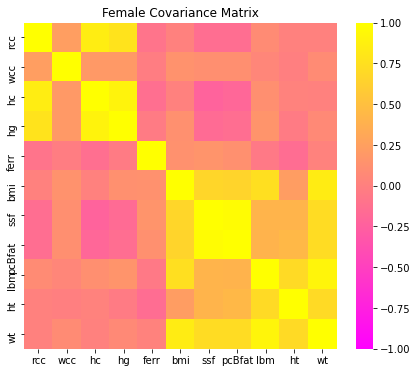

In [13]:
fig, ax = plt.subplots(figsize=(7,6))

sns.heatmap(cov_mat_fem, cmap='spring', vmin=-1, vmax=1, ax=ax)
ax.set_xticklabels(fem_data.columns)
ax.set_yticklabels(fem_data.columns)
ax.set_title('Female Covariance Matrix')

plt.show()

In [14]:
fa_fem = FactorAnalyzer(4, 'varimax')
fa_fem.fit(fem_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [15]:
evs_fem, _ = fa_fem.get_eigenvalues()
values_fem = {'Eigenvalues': evs_fem, 'Explanation': [ev*100/sum(evs_fem) for ev in evs_fem]}
pd.DataFrame(values_fem)

,Eigenvalues,Explanation
0,4.259859,38.725988
1,2.883280,26.211638
2,1.268236,11.529419
3,0.952080,8.655275
4,0.691247,6.284059
5,0.630179,5.728898
6,0.211739,1.924904
7,0.071654,0.651401
8,0.027616,0.251059
9,0.002519,0.022895


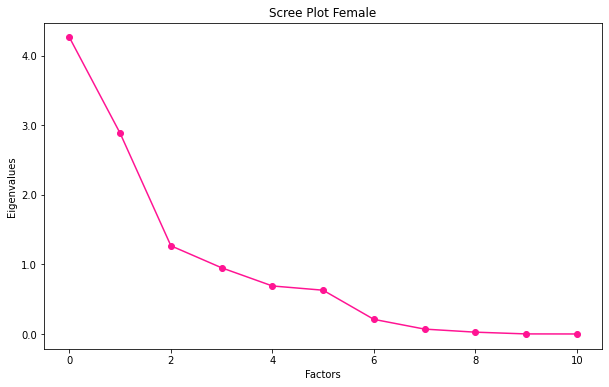

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(evs_fem, '-o', c='deeppink', )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Scree Plot Female')
ax.set_xlabel('Factors')
ax.set_ylabel('Eigenvalues')

plt.show()

In [17]:
communalities_fem = fa_fem.get_communalities()
pd.DataFrame(communalities_fem, index = fem_data.columns, columns=['Communalities'])

,Communalities
rcc,0.755801
wcc,0.088419
hc,0.981593
hg,0.838135
ferr,0.077279
bmi,0.996027
ssf,0.981048
pcBfat,0.962314
lbm,0.997472
ht,0.995250


In [18]:
loadings_fem = fa_fem.loadings_
pd.DataFrame(loadings_fem, index = fem_data.columns)

,0,1,2,3
rcc,-0.016109,0.859528,-0.071455,0.107928
wcc,0.034362,0.256766,0.133840,-0.058281
hc,0.014688,0.967318,-0.155002,0.147132
hg,0.108817,0.900187,-0.126263,0.003772
ferr,0.016988,-0.059786,0.130675,-0.237360
bmi,0.840727,0.109584,0.418918,-0.318910
ssf,0.335495,-0.079095,0.926462,-0.062483
pcBfat,0.327149,-0.062927,0.922566,-0.014107
lbm,0.934657,0.084117,0.124585,0.318263
ht,0.433978,-0.055706,0.333479,0.832226


In [19]:
factor_variances_fem = fa_fem.get_factor_variance()
pd.DataFrame(factor_variances_fem, index = ['Variance','Proportional variances','Cumulative variances'])

,0,1,2,3
Variance,2.707224,2.588692,2.333464,1.041202
Proportional variances,0.246111,0.235336,0.212133,0.094655
Cumulative variances,0.246111,0.481447,0.693580,0.788235


In [20]:
pca = PCA(2)
fem_data_pca_scores = pca.fit_transform(fem_data_scaled)
fem_data_pca_components = pca.components_
pd.DataFrame(fem_data_pca_components.T, index = fem_data.columns)

,0,1
rcc,0.029323,0.533391
wcc,-0.060999,0.185030
hc,0.041341,0.564486
hg,0.008612,0.547683
ferr,-0.038477,-0.095127
bmi,-0.409634,0.064309
ssf,-0.410588,-0.115149
pcBfat,-0.411607,-0.103326
lbm,-0.397811,0.140400
ht,-0.323412,0.040683


In [21]:
fem_data_pca_scores = pd.concat([pd.DataFrame(fem_data_pca_scores), atletas_femininas['sport']], axis=1)

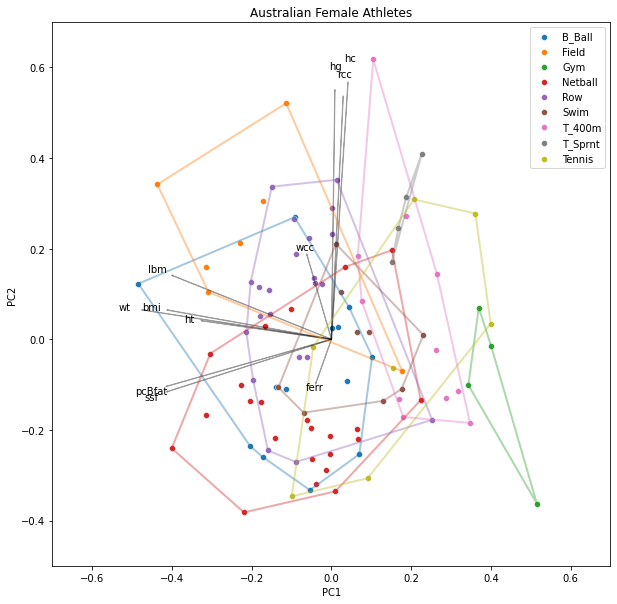

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

fem_data_pca_scores['PC1'] = fem_data_pca_scores[0]/(fem_data_pca_scores[0].max() - fem_data_pca_scores[0].min())
fem_data_pca_scores['PC2'] = fem_data_pca_scores[1]/(fem_data_pca_scores[1].max() - fem_data_pca_scores[1].min())

for i,j in enumerate(fem_data.columns):
  ax.arrow(0, 0, fem_data_pca_components[0][i], fem_data_pca_components[1][i], color='black', alpha=0.3, lw=1)
  ax.text(fem_data_pca_components[0][i]*1.1, fem_data_pca_components[1][i]*1.1, j, color='black', ha='center', va='center')

for name, group in fem_data_pca_scores.groupby('sport'):
  sns.scatterplot(x='PC1', y='PC2', data=group, label=name, ax=ax)
  points = group.drop(columns=[0,1,'sport']).values
  hull = ConvexHull(points)
  vertices = np.append(hull.vertices, hull.vertices[0])
  ax.plot(points[vertices, 0], points[vertices, 1], alpha=0.4, lw=2)

ax.set_xlim(-0.7,0.7)
ax.set_ylim(-0.5,0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Australian Female Athletes')

plt.show()

In [23]:
atletas_masculinos = df[df['sex'] == 'm'].reset_index(drop=True)

In [24]:
masc_data = atletas_masculinos.iloc[:,:-2]

In [25]:
chi_square_value_masc, p_value_masc = calculate_bartlett_sphericity(masc_data)
chi_square_value_masc, p_value_masc

(1815.1732880896202, 0.0)

In [26]:
_, kmo_model_masc = calculate_kmo(masc_data)
kmo_model_masc

0.6659900473484033

In [27]:
masc_data_scaled = StandardScaler().fit_transform(masc_data)
cov_mat_masc = np.cov(masc_data_scaled.T, bias=True)
pd.DataFrame(cov_mat_masc)

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.063450,0.862763,0.788230,-0.027188,0.179775,0.087307,0.115273,0.066242,-0.086260,0.082696
1,0.063450,1.000000,0.114072,0.068657,0.190507,0.182327,0.371302,0.379792,0.106700,0.102022,0.188042
2,0.862763,0.114072,1.000000,0.894963,-0.017462,0.237229,0.099052,0.111572,0.094061,-0.112858,0.109587
3,0.788230,0.068657,0.894963,1.000000,0.028944,0.289958,0.103077,0.101750,0.101566,-0.174656,0.116103
4,-0.027188,0.190507,-0.017462,0.028944,1.000000,0.228772,0.208382,0.240584,0.025349,-0.159207,0.082470
5,0.179775,0.182327,0.237229,0.289958,0.228772,1.000000,0.655329,0.627027,0.762869,0.151681,0.835498
6,0.087307,0.371302,0.099052,0.103077,0.208382,0.655329,1.000000,0.967271,0.439359,0.253785,0.634269
7,0.115273,0.379792,0.111572,0.101750,0.240584,0.627027,0.967271,1.000000,0.370412,0.192382,0.580600
8,0.066242,0.106700,0.094061,0.101566,0.025349,0.762869,0.439359,0.370412,1.000000,0.712543,0.970197
9,-0.086260,0.102022,-0.112858,-0.174656,-0.159207,0.151681,0.253785,0.192382,0.712543,1.000000,0.666500


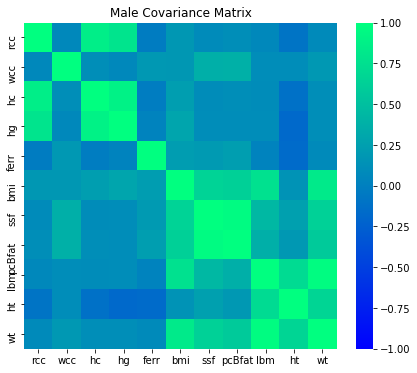

In [28]:
fig, ax = plt.subplots(figsize=(7,6))

sns.heatmap(cov_mat_masc, cmap='winter', vmin=-1, vmax=1, ax=ax)
ax.set_xticklabels(masc_data.columns)
ax.set_yticklabels(masc_data.columns)
ax.set_title('Male Covariance Matrix')

plt.show()

In [29]:
fa_masc = FactorAnalyzer(4, 'varimax')
fa_masc.fit(masc_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [30]:
evs_masc, _ = fa_masc.get_eigenvalues()
values_masc = {'Eigenvalues': evs_masc, 'Explanation': [ev*100/sum(evs_masc) for ev in evs_masc]}
pd.DataFrame(values_masc)

,Eigenvalues,Explanation
0,4.262346,38.748600
1,2.676002,24.327294
2,1.565704,14.233677
3,0.913675,8.306138
4,0.776747,7.061339
5,0.495240,4.502181
6,0.193564,1.759671
7,0.084326,0.766600
8,0.028531,0.259368
9,0.003005,0.027318


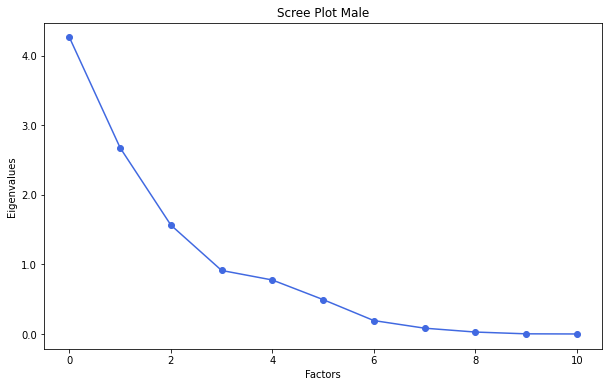

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(evs_masc, '-o', c='Royalblue', )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Scree Plot Male')
ax.set_xlabel('Factors')
ax.set_ylabel('Eigenvalues')

plt.show()

In [32]:
communalities_masc = fa_masc.get_communalities()
pd.DataFrame(communalities_masc, index = masc_data.columns, columns=['Communalities'])

,Communalities
rcc,0.765248
wcc,0.165982
hc,0.979033
hg,0.836807
ferr,0.127386
bmi,0.997247
ssf,0.936739
pcBfat,0.986913
lbm,0.996473
ht,0.997068


In [33]:
loadings_masc = fa_masc.loadings_
pd.DataFrame(loadings_masc, index = masc_data.columns)

,0,1,2,3
rcc,0.014306,0.871677,0.065425,0.030695
wcc,0.046408,0.060343,0.400052,0.012071
hc,0.044237,0.986380,0.064228,0.002115
hg,0.093321,0.901765,0.035103,-0.116984
ferr,0.057462,-0.028451,0.232006,-0.263531
bmi,0.834295,0.176346,0.379483,-0.355098
ssf,0.346442,0.031515,0.902298,-0.039779
pcBfat,0.275364,0.044800,0.950390,-0.076415
lbm,0.954581,0.042039,0.133275,0.256354
ht,0.506917,-0.145211,0.134386,0.837232


In [34]:
factor_variances_masc = fa_masc.get_factor_variance()
pd.DataFrame(factor_variances_masc, index = ['Variance','Proportional variances','Cumulative variances'])

,0,1,2,3
Variance,2.905082,2.609475,2.249896,1.022317
Proportional variances,0.264098,0.237225,0.204536,0.092938
Cumulative variances,0.264098,0.501323,0.705859,0.798797


In [35]:
pca = PCA(2)
masc_data_pca_scores = pca.fit_transform(masc_data_scaled)
masc_data_pca_components = pca.components_
pd.DataFrame(masc_data_pca_components.T, index = masc_data.columns)

,0,1
rcc,0.144820,0.527020
wcc,0.175976,0.001174
hc,0.162098,0.548767
hg,0.161412,0.538927
ferr,0.095280,-0.009543
bmi,0.420512,-0.002694
ssf,0.395032,-0.085323
pcBfat,0.379182,-0.064116
lbm,0.396983,-0.155902
ht,0.233051,-0.267075


In [36]:
masc_data_pca_scores = pd.concat([pd.DataFrame(masc_data_pca_scores), atletas_masculinos['sport']], axis=1)

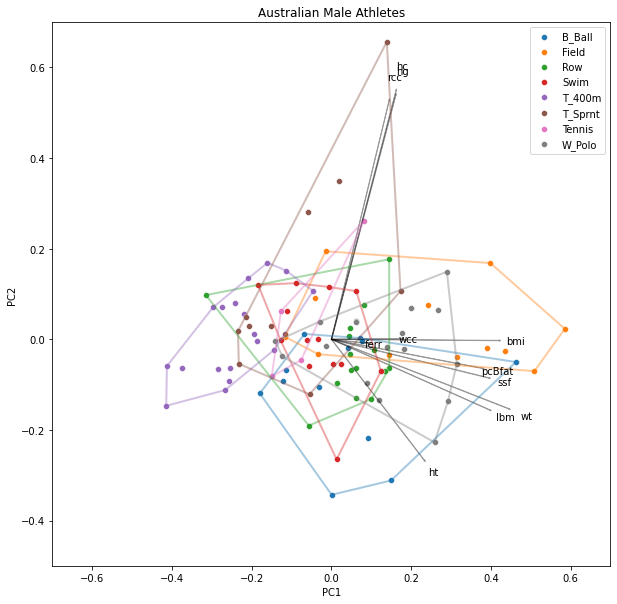

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

masc_data_pca_scores['PC1'] = masc_data_pca_scores[0]/(masc_data_pca_scores[0].max() - masc_data_pca_scores[0].min())
masc_data_pca_scores['PC2'] = masc_data_pca_scores[1]/(masc_data_pca_scores[1].max() - masc_data_pca_scores[1].min())

for i,j in enumerate(masc_data.columns):
  ax.arrow(0, 0, masc_data_pca_components[0][i], masc_data_pca_components[1][i], color='black', alpha=0.3, lw=1)
  ax.text(masc_data_pca_components[0][i]*1.1, masc_data_pca_components[1][i]*1.1, j, color='black', ha='center', va='center')

for name, group in masc_data_pca_scores.groupby('sport'):
  sns.scatterplot(x='PC1', y='PC2', data=group, label=name, ax=ax)
  points = group.drop(columns=[0,1,'sport']).values
  hull = ConvexHull(points)
  vertices = np.append(hull.vertices, hull.vertices[0])
  ax.plot(points[vertices, 0], points[vertices, 1], alpha=0.4, lw=2)

ax.set_xlim(-0.7,0.7)
ax.set_ylim(-0.5,0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Australian Male Athletes')

plt.show()